# A/B Testing
created by Aadika45

## Prepare the dataframe

In [6]:
# import some needed libraries 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [7]:
## data resources
sheet_url  = 'https://docs.google.com/spreadsheets/d/13BZNsOOuW2PMsudqJkDTYreEDbmCZ6fXt6vJmloRygY/edit#gid=1912218045'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)

In [8]:
df.shape

(172699, 31)

In [9]:
df.head(3).T

,0,1,2
event_id,184148,190963,264314
event_name,checkout,checkout,checkout
timestamp_event,2020-05-30 09:31:27 UTC,2020-07-11 06:22:54 UTC,2021-08-06 15:07:07 UTC
user_id,10240,10240,10240
user_name,Mulya Zulkarnain,Mulya Zulkarnain,Mulya Zulkarnain
user_gender,male,male,male
user_register_date,2020-01-09,2020-01-09,2020-01-09
user_city,Tangerang Selatan,Tangerang Selatan,Tangerang Selatan
user_province,Banten,Banten,Banten
favorite_flag,NaN,NaN,1.0


In [10]:
#check data one person

Mulya_Zulkarnain = df[(df['user_name'] == 'Mulya Zulkarnain')]
Mulya_Zulkarnain.head(4)

,event_id,event_name,timestamp_event,user_id,user_name,user_gender,user_register_date,user_city,user_province,favorite_flag,...,product,product_category_id,product_category,merchant_id,merchant_name,merchant_city,merchant_province,quantity,price,total_per_event
0,184148,checkout,2020-05-30 09:31:27 UTC,10240,Mulya Zulkarnain,male,2020-01-09,Tangerang Selatan,Banten,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311
1,190963,checkout,2020-07-11 06:22:54 UTC,10240,Mulya Zulkarnain,male,2020-01-09,Tangerang Selatan,Banten,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311
2,264314,checkout,2021-08-06 15:07:07 UTC,10240,Mulya Zulkarnain,male,2020-01-09,Tangerang Selatan,Banten,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311
3,160097,checkout,2020-01-11 06:21:22 UTC,10240,Mulya Zulkarnain,male,2020-01-09,Tangerang Selatan,Banten,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311


total_visit defined as total one user visitting our website

In [11]:
Total_visit = df.groupby(['user_id','user_name','user_gender'])['event_name'].agg('count').reset_index(name='total_visit')
Total_visit.head(3)

,user_id,user_name,user_gender,total_visit
0,10000,Warta Pradipta,male,82
1,10001,Jaya Mahendra S.Ked,male,70
2,10002,Balidin Sitorus,male,111


total_visit_complete_flag1 defined as total 

In [12]:
complete_flag1 = df[(df['event_name'] == 'complete')&(df['favorite_flag']==1)]
total_complete_flag1 = complete_flag1.groupby(['user_id','user_name','user_gender'])['event_name'].agg('count').reset_index(name='total_visit_complete_flag1')
total_complete_flag1.head(3)

,user_id,user_name,user_gender,total_visit_complete_flag1
0,10000,Warta Pradipta,male,3
1,10001,Jaya Mahendra S.Ked,male,6
2,10002,Balidin Sitorus,male,12


In [13]:
complete_flag0 = df[(df['event_name'] == 'complete')&(df['favorite_flag']==0)]
total_complete_flag0 = complete_flag0.groupby(['user_id','user_name','user_gender'])['event_name'].agg('count').reset_index(name='total_visit_complete_flag0')
total_complete_flag0.head(3) 

,user_id,user_name,user_gender,total_visit_complete_flag0
0,10551,Galang Catur Widodo S.IP,male,3
1,10552,Mahdi Ibun Kusumo,male,2
2,10553,Emin Sihombing,male,5


In [14]:
#combine two tabel flag 0
conversion_rate_flag0 = pd.merge(Total_visit,total_complete_flag0, on=['user_id','user_name','user_gender'])
conversion_rate_flag0['conversion_rate_flag_zero'] = (conversion_rate_flag0.total_visit_complete_flag0/conversion_rate_flag0.total_visit)*100
conversion_rate_flag0.head(3)

,user_id,user_name,user_gender,total_visit,total_visit_complete_flag0,conversion_rate_flag_zero
0,10551,Galang Catur Widodo S.IP,male,80,3,3.750000
1,10552,Mahdi Ibun Kusumo,male,65,2,3.076923
2,10553,Emin Sihombing,male,82,5,6.097561


In [15]:
#combine two tabel flag 1
conversion_rate_flag1 = pd.merge(Total_visit,total_complete_flag1, on=['user_id','user_name','user_gender'])
conversion_rate_flag1['conversion_rate_flag_one'] = (conversion_rate_flag1.
total_visit_complete_flag1/conversion_rate_flag1.total_visit)*100
conversion_rate_flag1.head(3)

,user_id,user_name,user_gender,total_visit,total_visit_complete_flag1,conversion_rate_flag_one
0,10000,Warta Pradipta,male,82,3,3.658537
1,10001,Jaya Mahendra S.Ked,male,70,6,8.571429
2,10002,Balidin Sitorus,male,111,12,10.810811


In [16]:
# Recall table segmentation

sheet_url_segmn  = 'https://docs.google.com/spreadsheets/d/1jpZ-a0e_EMbuXEel-4BQpGFN2kmpMfUT/edit#gid=1020356738'
sheet_url_trf_segmn = sheet_url_segmn.replace('/edit#gid=', '/export?format=csv&gid=')
segmentation = pd.read_csv(sheet_url_trf_segmn)

In [17]:
segmentation.shape

(1998, 10)

In [18]:
segmentation.head(3)

,user_id,last_transaction_date,recency,frequency,monetary,R,F,M,RFM_score,RFM_segment
0,10088,2021-06-26,188,9,9545000,2,4,5,245,4. Jack
1,10089,2021-12-12,19,9,8655000,5,4,5,545,1. Ace
2,10101,2021-10-08,84,6,6110000,3,2,4,324,2. King


In [19]:
segment = segmentation[['user_id','RFM_segment']]
segment.head(3)

,user_id,RFM_segment
0,10088,4. Jack
1,10089,1. Ace
2,10101,2. King


In [20]:
#combine conversion rate flage 1 with segmentation
conversion_rate_flag1_segmnt = pd.merge(conversion_rate_flag1,segment, on='user_id')
conversion_rate_flag1_segmnt.head(3)


,user_id,user_name,user_gender,total_visit,total_visit_complete_flag1,conversion_rate_flag_one,RFM_segment
0,10000,Warta Pradipta,male,82,3,3.658537,2. King
1,10001,Jaya Mahendra S.Ked,male,70,6,8.571429,2. King
2,10002,Balidin Sitorus,male,111,12,10.810811,2. King


In [21]:
#combine conversion rate flage0 with segmentation
conversion_rate_flag0_segmnt = pd.merge(conversion_rate_flag0,segment, on='user_id')
conversion_rate_flag0_segmnt.head(3)


,user_id,user_name,user_gender,total_visit,total_visit_complete_flag0,conversion_rate_flag_zero,RFM_segment
0,10551,Galang Catur Widodo S.IP,male,80,3,3.750000,5. Lost
1,10552,Mahdi Ibun Kusumo,male,65,2,3.076923,5. Lost
2,10553,Emin Sihombing,male,82,5,6.097561,3. Queen


## Initiate Hypothesis Testing 
in this case we performed A/B testing with value is conversion rate for each user

### Z-test

z-test pada dua populasi, $z = \frac{(\bar{x}_i - \bar{x}_j)-([H_0])}{\sqrt{\frac{s_i^2}{n_i}+\frac{s_i^2}{n_i}}}$

[$H_0$] for two populations has a meaning $\mu_x - \mu_y = 0$ (for two tails test)

In [22]:
#z-test for two independent population two tails with \alpha = 5%
#created by AAdika45

# a code of standard deviation by definition
def std_sampel(data):
    sigma = 0
    if len(data) == 0:
        print('There is no data')
        pass
    else:
        avg = data.mean()
        for i in data:
            sigma += (i - avg)**2
            std = np.sqrt(sigma/len(data)-1)
    std = float("{:.3f}".format(std))
    return std

def z_test_twoPop(data1,data2):
    zeta = data1.mean() - data2.mean()
    omega = std_sampel(data1)**2/len(data1) + std_sampel(data2)**2/len(data2) 
    gamma = np.sqrt(omega)
    z = zeta/gamma
    if z<-1.645 or z>1.645: #change condition if you need one tail
        print(f'Hypothesis H_0 is rejected!')
    else:
        print(f'Hypothesis H_0 is failed to be rejected!')
    return

Our Hypothesis: $\\$
$H_0$ : There is no different in terms of conversion rate between user using flag 0 or flag 1 $\\$
$H_1$ : There is different in terms of conversion rate between user using flag 0 or flag 1. 

In [23]:
from statsmodels.stats.weightstats import ztest as ztest

In [24]:
from scipy.stats import ttest_ind, boxcox,yeojohnson

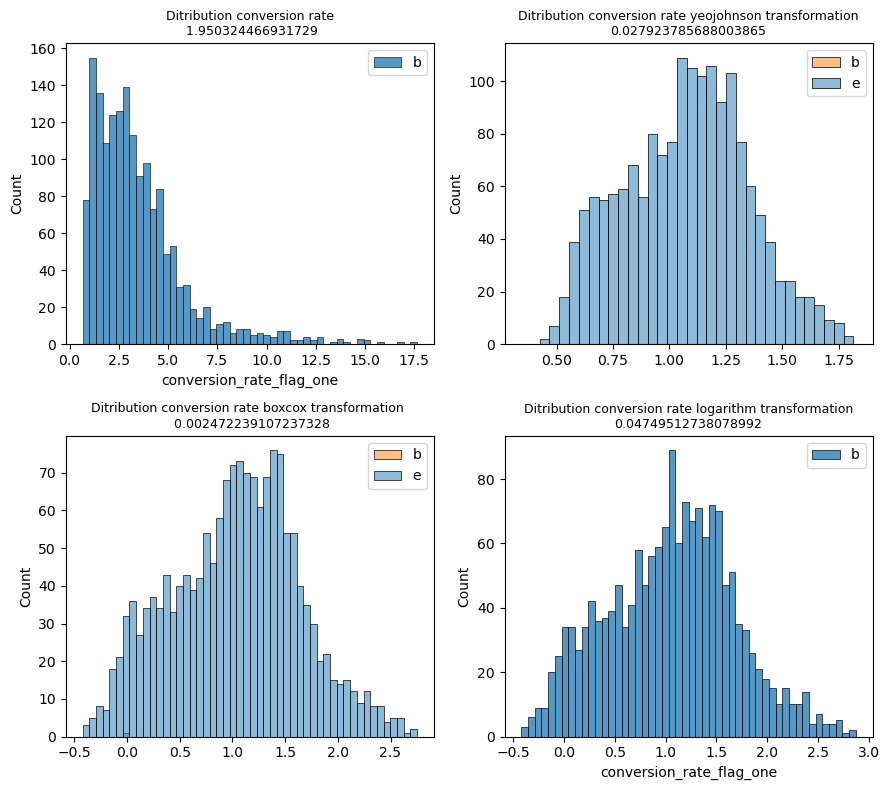

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(9,8))


plt.subplot(221)
sns.histplot((conversion_rate_flag1_segmnt.conversion_rate_flag_one), bins=50)
plt.title(f'Ditribution conversion rate\n {conversion_rate_flag1_segmnt.conversion_rate_flag_one.skew()}',fontsize = 9)
plt.legend('best')
plt.tight_layout()

plt.subplot(222)
sns.histplot(yeojohnson(conversion_rate_flag1_segmnt.conversion_rate_flag_one), bins=50)
plt.title(f'Ditribution conversion rate yeojohnson transformation\n{pd.Series(yeojohnson(conversion_rate_flag1_segmnt.conversion_rate_flag_one)[0]).skew()}',fontsize = 9)
plt.legend('best')
plt.xlim(0.27,1.9)
plt.tight_layout()

plt.subplot(223)
sns.histplot(boxcox(conversion_rate_flag1_segmnt.conversion_rate_flag_one), bins=50)
plt.title(f'Ditribution conversion rate boxcox transformation \n {pd.Series(boxcox(conversion_rate_flag1_segmnt.conversion_rate_flag_one)[0]).skew()}',fontsize = 9)
plt.legend('best')
plt.tight_layout()

plt.subplot(224)
sns.histplot(np.log(conversion_rate_flag1_segmnt.conversion_rate_flag_one), bins=50)
plt.title(f'Ditribution conversion rate logarithm transformation\n{np.log(conversion_rate_flag1_segmnt.conversion_rate_flag_one).skew()}',fontsize = 9)
plt.legend('best')
plt.tight_layout()


In [26]:
#normally distributed 
AB = np.array(ztest(boxcox(conversion_rate_flag1_segmnt.conversion_rate_flag_one)[0],
boxcox(conversion_rate_flag0_segmnt.conversion_rate_flag_zero)[0], value=0))
def conclusion(x):
    if x[1]<0.05:
        return print('H_0 is rejected')
conclusion(AB)

H_0 is rejected


In [27]:
AB = np.array(ztest(conversion_rate_flag1_segmnt.conversion_rate_flag_one,conversion_rate_flag0_segmnt.conversion_rate_flag_zero, value=0))
def conclusion(x):
    if x[1]<0.05:
        return print('H_0 is rejected')
conclusion(AB)

H_0 is rejected


$H_1$ is rejected, hence we have enough evident stated that flag 1 and flag 0 is different with 95% confident. 

### t-test for two population

We do one tail test

Hypothesis:

$H_0: \mu_{flag1}\leq \mu_{flag0} \\$
$H_1: \mu_{flag1} > \mu_{flag0}$

In [28]:
#normally distributed

ttest,p_value = ttest_ind(boxcox(conversion_rate_flag1_segmnt.conversion_rate_flag_one)[0],
boxcox(conversion_rate_flag0_segmnt.conversion_rate_flag_zero)[0])
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00000000
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


In [29]:
ttest,p_value = ttest_ind(conversion_rate_flag1_segmnt.conversion_rate_flag_one,conversion_rate_flag0_segmnt.conversion_rate_flag_zero)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00000000
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


Conclusion: $\\$

We have an evident that the average of conversion rate of flag 1 is bigger than flag 0 with 95% confident level for given data!



### Investigate for each segmentation user

In [30]:
#count user flag 1 for each segment

segment_flag1 = conversion_rate_flag1_segmnt.groupby('RFM_segment')['conversion_rate_flag_one'].agg(['count','mean']).reset_index()
segment_flag1 = segment_flag1.rename(columns={'mean':'mean_flag_1','count':'count_flag_1'})
segment_flag1 

,RFM_segment,count_flag_1,mean_flag_1
0,1. Ace,277,3.385612
1,2. King,411,4.601818
2,3. Queen,393,3.425895
3,4. Jack,366,2.667245
4,5. Lost,211,2.916331


In [31]:
#count user flag 0 for each segment

segment_flag0 = conversion_rate_flag0_segmnt.groupby('RFM_segment')['conversion_rate_flag_zero'].agg(['count','mean']).reset_index()
segment_flag0 = segment_flag0.rename(columns={'mean':'mean_flag_0','count':'count_flag_0'})
segment_flag0 

,RFM_segment,count_flag_0,mean_flag_0
0,1. Ace,119,1.580928
1,2. King,100,2.229720
2,3. Queen,132,2.805328
3,4. Jack,148,1.546243
4,5. Lost,65,2.427120


In [32]:
#merge two datafram

AB_test_segmnt = pd.merge(segment_flag1,segment_flag0, on='RFM_segment')
AB_test_segmnt

,RFM_segment,count_flag_1,mean_flag_1,count_flag_0,mean_flag_0
0,1. Ace,277,3.385612,119,1.580928
1,2. King,411,4.601818,100,2.229720
2,3. Queen,393,3.425895,132,2.805328
3,4. Jack,366,2.667245,148,1.546243
4,5. Lost,211,2.916331,65,2.427120


In [33]:
#for automatic calculation, we create array for two population for each segment

x = list()
y = list()
for i in AB_test_segmnt.iloc[:,0]:
    z = conversion_rate_flag0.where(conversion_rate_flag0_segmnt.RFM_segment == str(i)).dropna()
    a = z.conversion_rate_flag_zero
    x.append(a)
    Flag_0_segmnt = np.array(x)

for i in AB_test_segmnt.iloc[:,0]:
    z = conversion_rate_flag1.where(conversion_rate_flag1_segmnt.RFM_segment == str(i)).dropna()
    b = z.conversion_rate_flag_one
    y.append(b)
    Flag_1_segmnt = np.array(y)

pvalue = list()
for i in range(0, len(AB_test_segmnt.iloc[:,0])):
    ttest,p_value = ttest_ind(boxcox(Flag_1_segmnt[i])[0],boxcox(Flag_0_segmnt[i])[0])
    pvalue.append(p_value/2)
AB_test_segmnt['p_value/2']= pd.Series(pvalue)
AB_test_segmnt['conclusion'] = AB_test_segmnt['p_value/2'].apply(lambda x: 'flag 1 > flag 0 with confident 95%' if x < 0.05 else 'flag 1< flag 0')

In [34]:
AB_test_segmnt

,RFM_segment,count_flag_1,mean_flag_1,count_flag_0,mean_flag_0,p_value/2,conclusion
0,1. Ace,277,3.385612,119,1.580928,7.498462e-34,flag 1 > flag 0 with confident 95%
1,2. King,411,4.601818,100,2.229720,3.857754e-26,flag 1 > flag 0 with confident 95%
2,3. Queen,393,3.425895,132,2.805328,3.229317e-06,flag 1 > flag 0 with confident 95%
3,4. Jack,366,2.667245,148,1.546243,1.494487e-16,flag 1 > flag 0 with confident 95%
4,5. Lost,211,2.916331,65,2.427120,2.867600e-04,flag 1 > flag 0 with confident 95%
